(4, 11, 14)


<IPython.core.display.Javascript object>


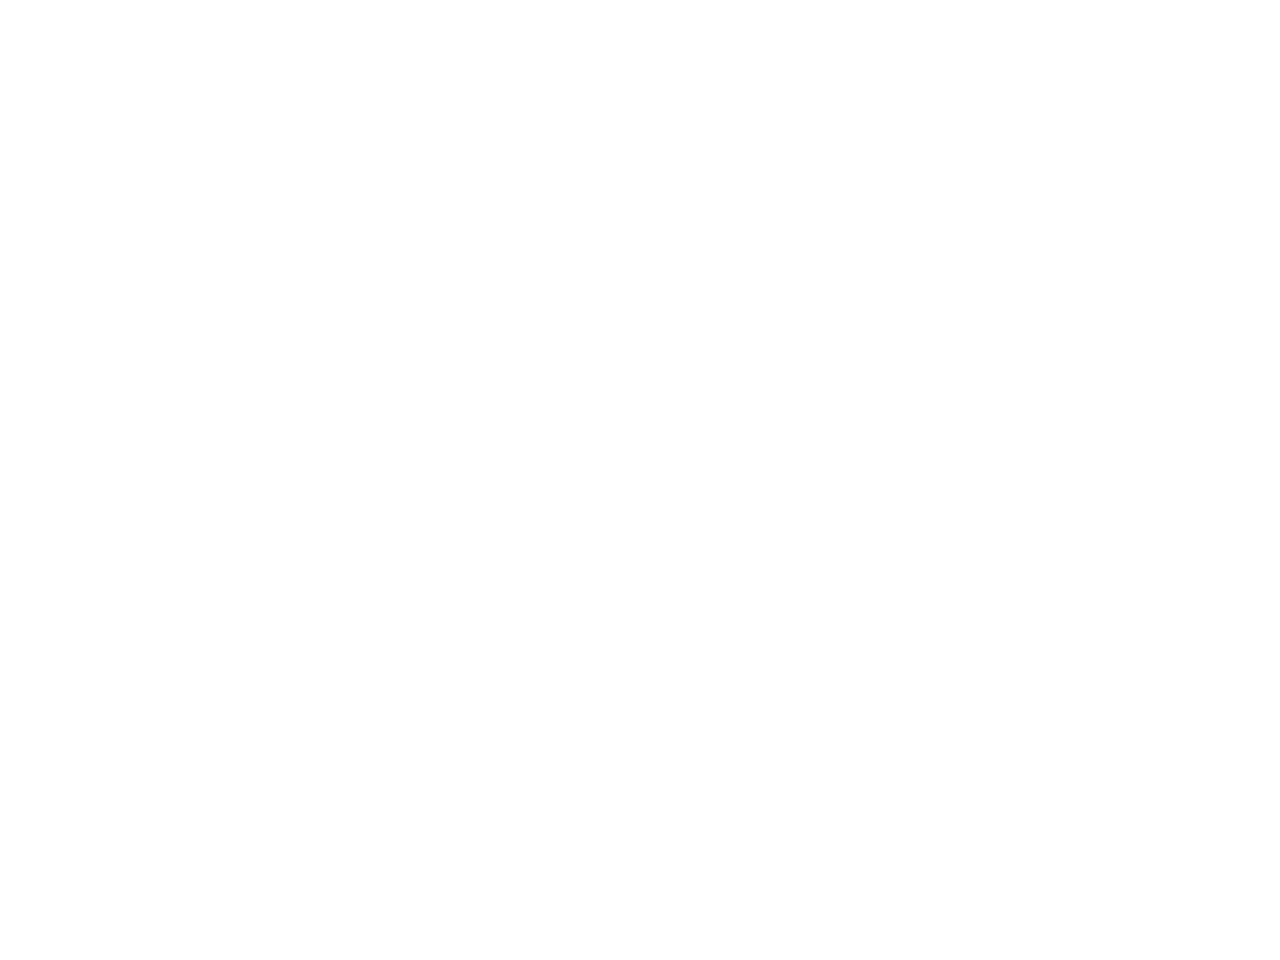

<IPython.core.display.Javascript object>


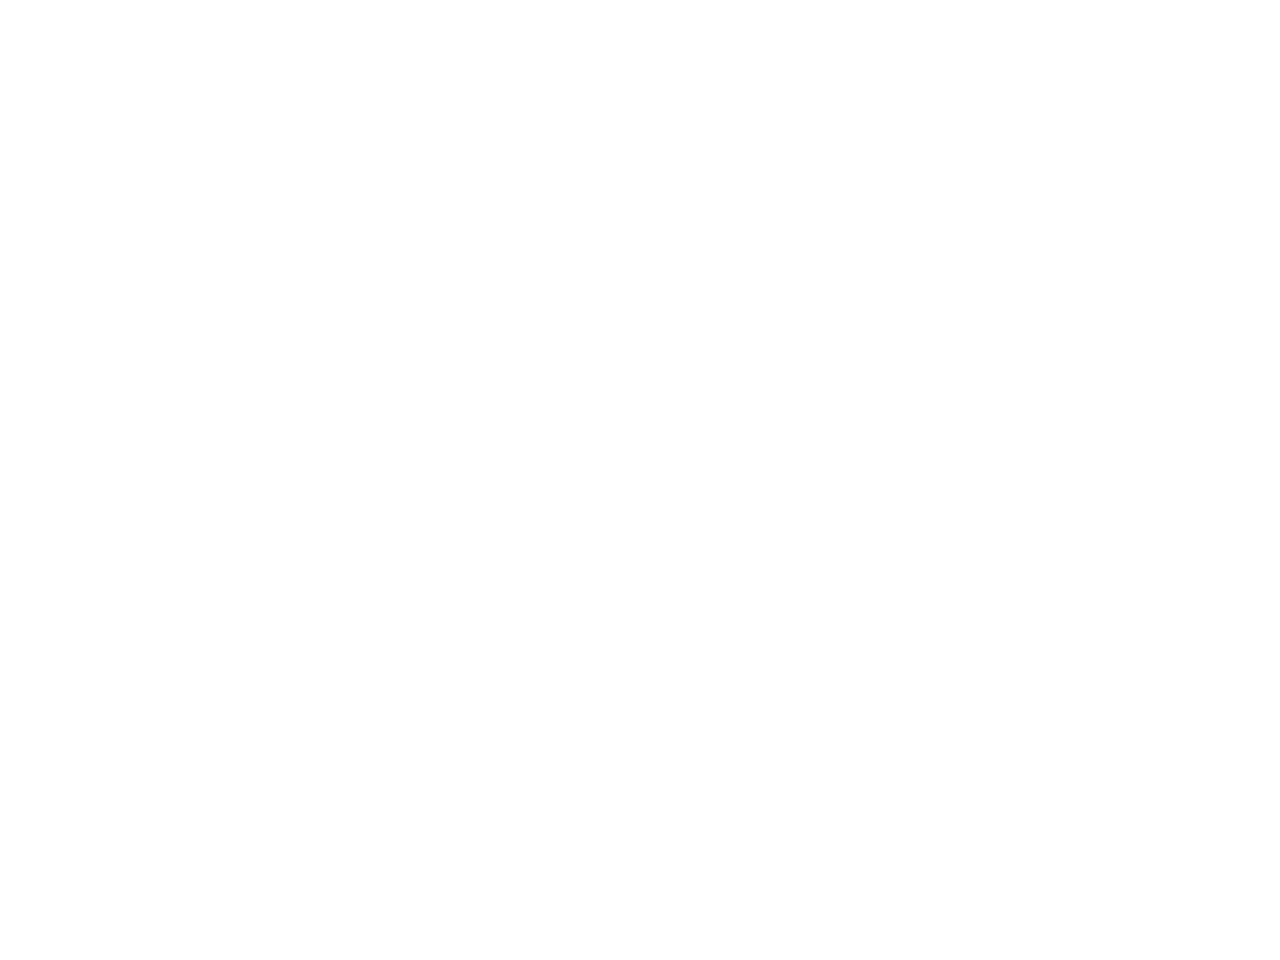

<IPython.core.display.Javascript object>


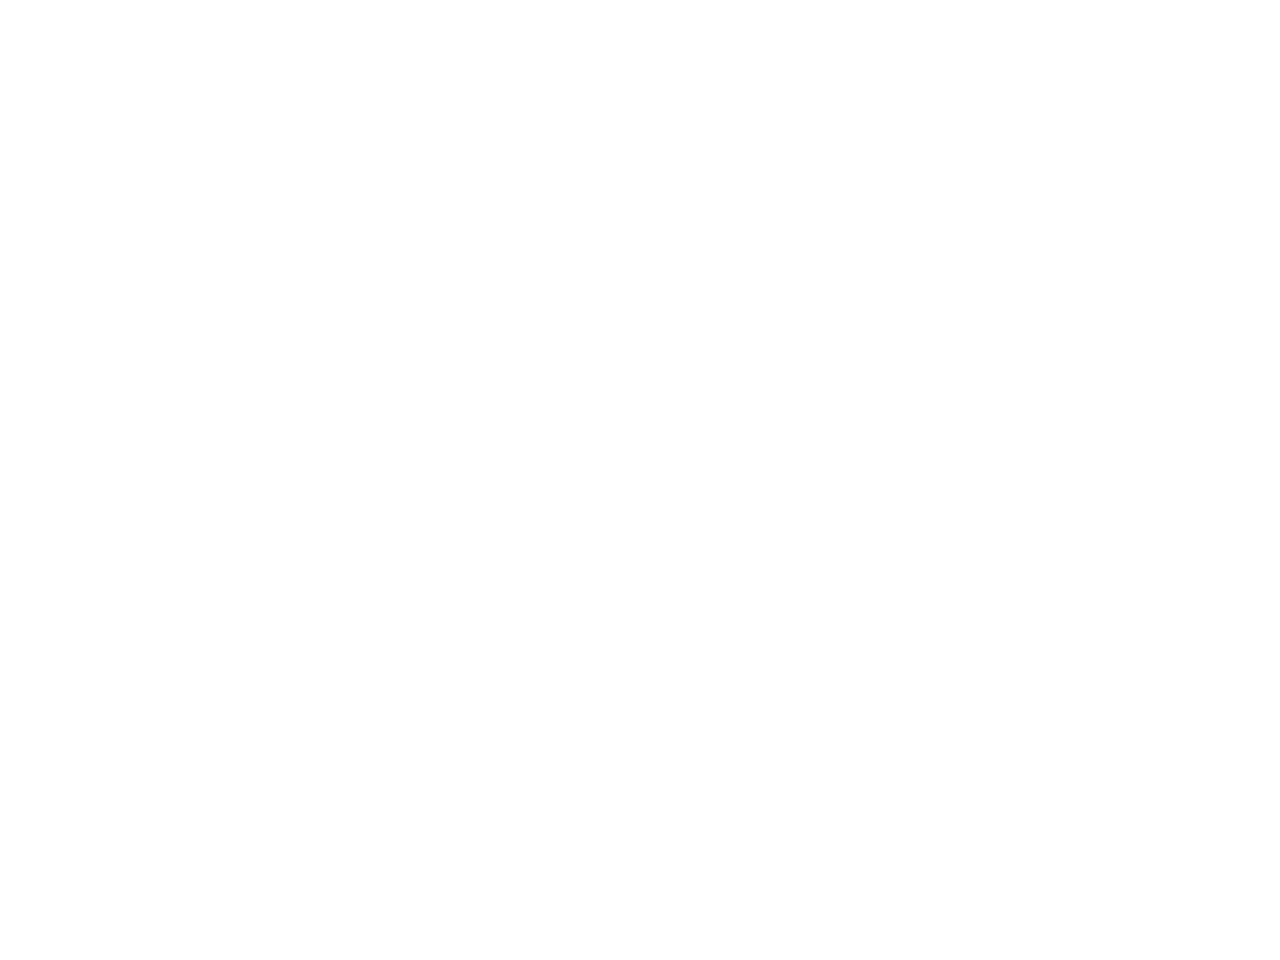

[[ 0.  2.  0.]
 [ 2.  2.  2.]
 [ 0.  2.  0.]]


<IPython.core.display.Javascript object>


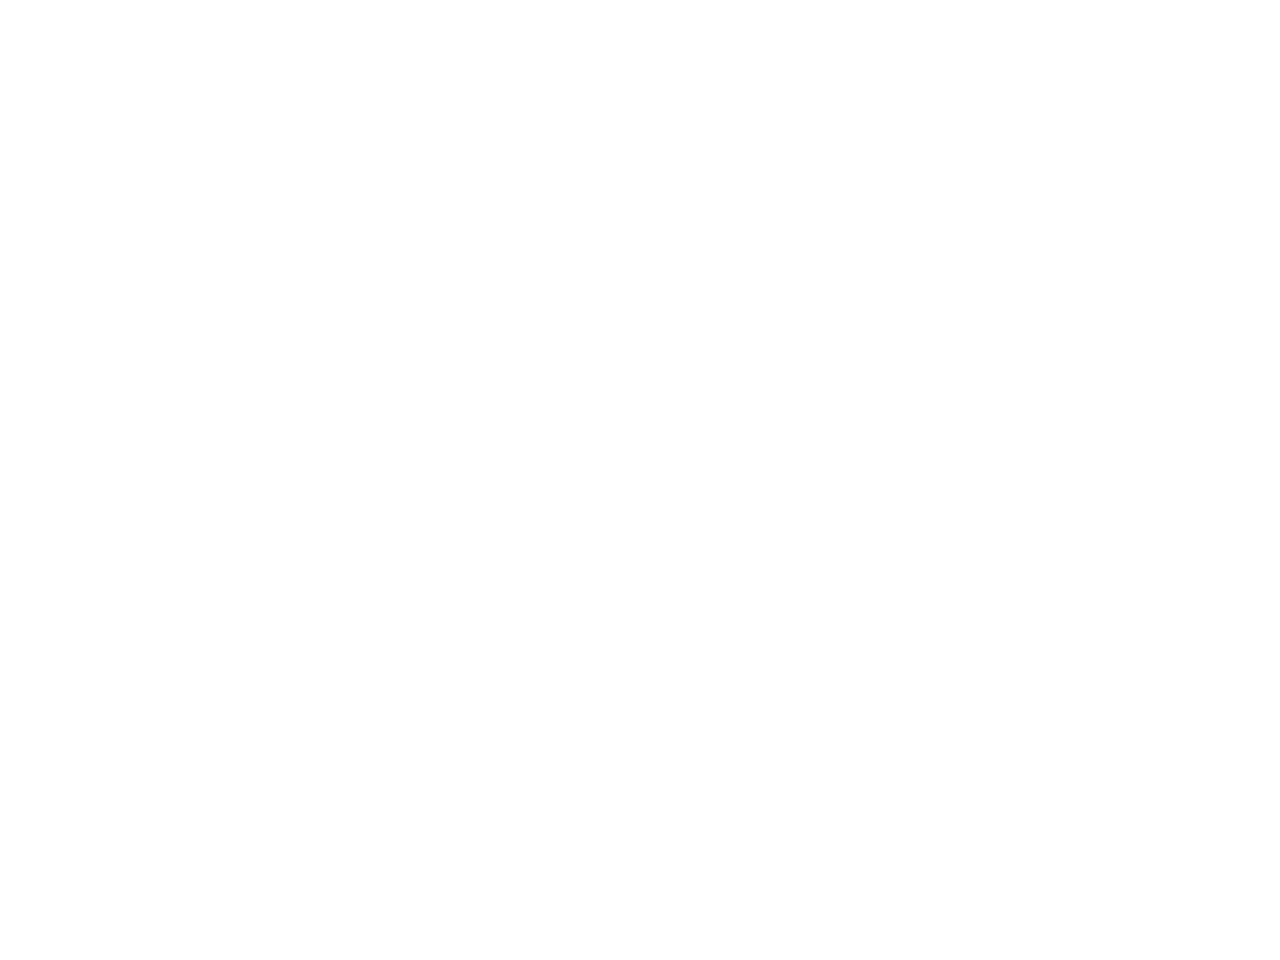

<IPython.core.display.Javascript object>


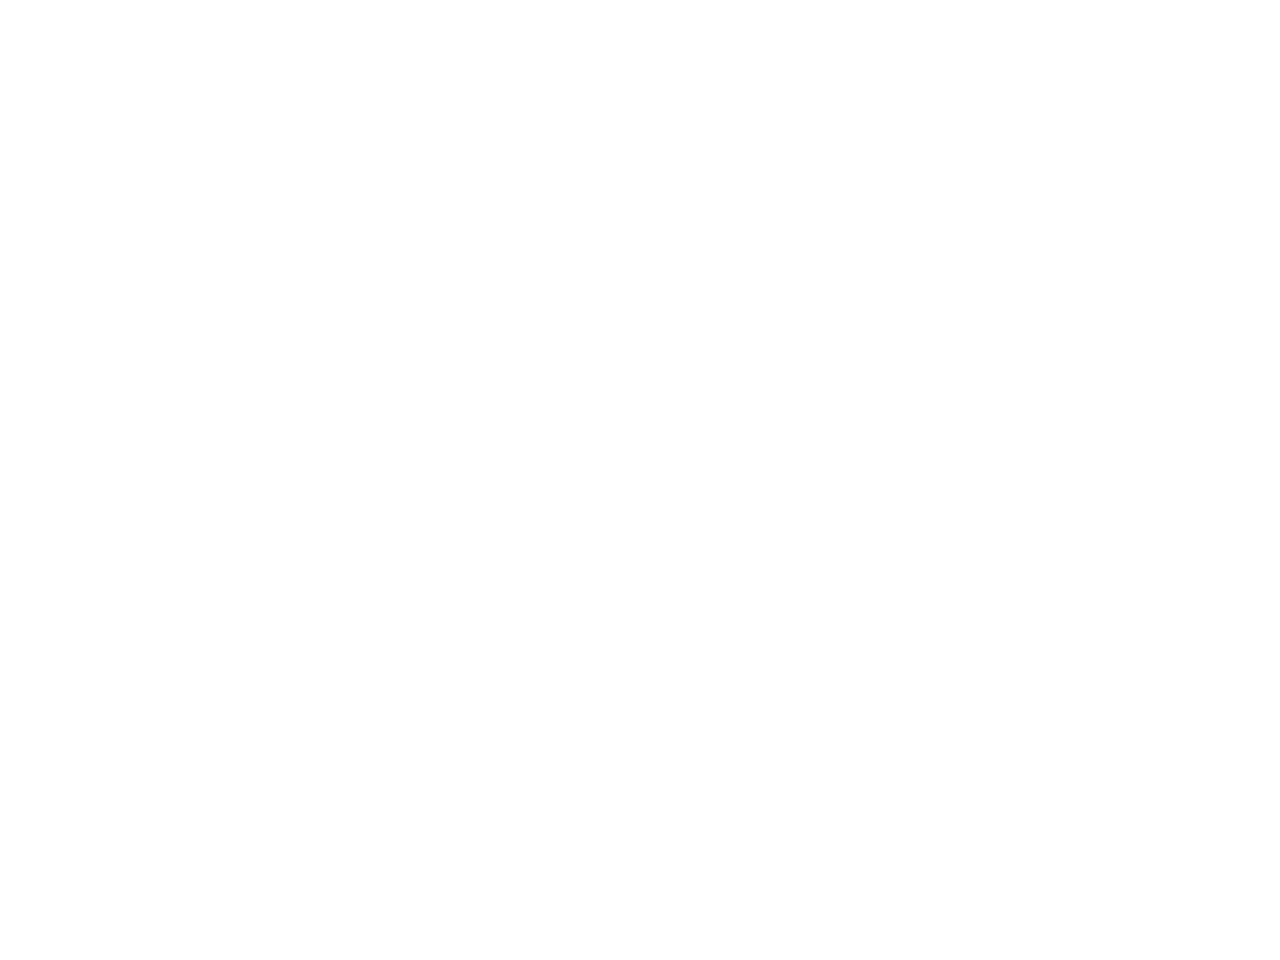

<IPython.core.display.Javascript object>


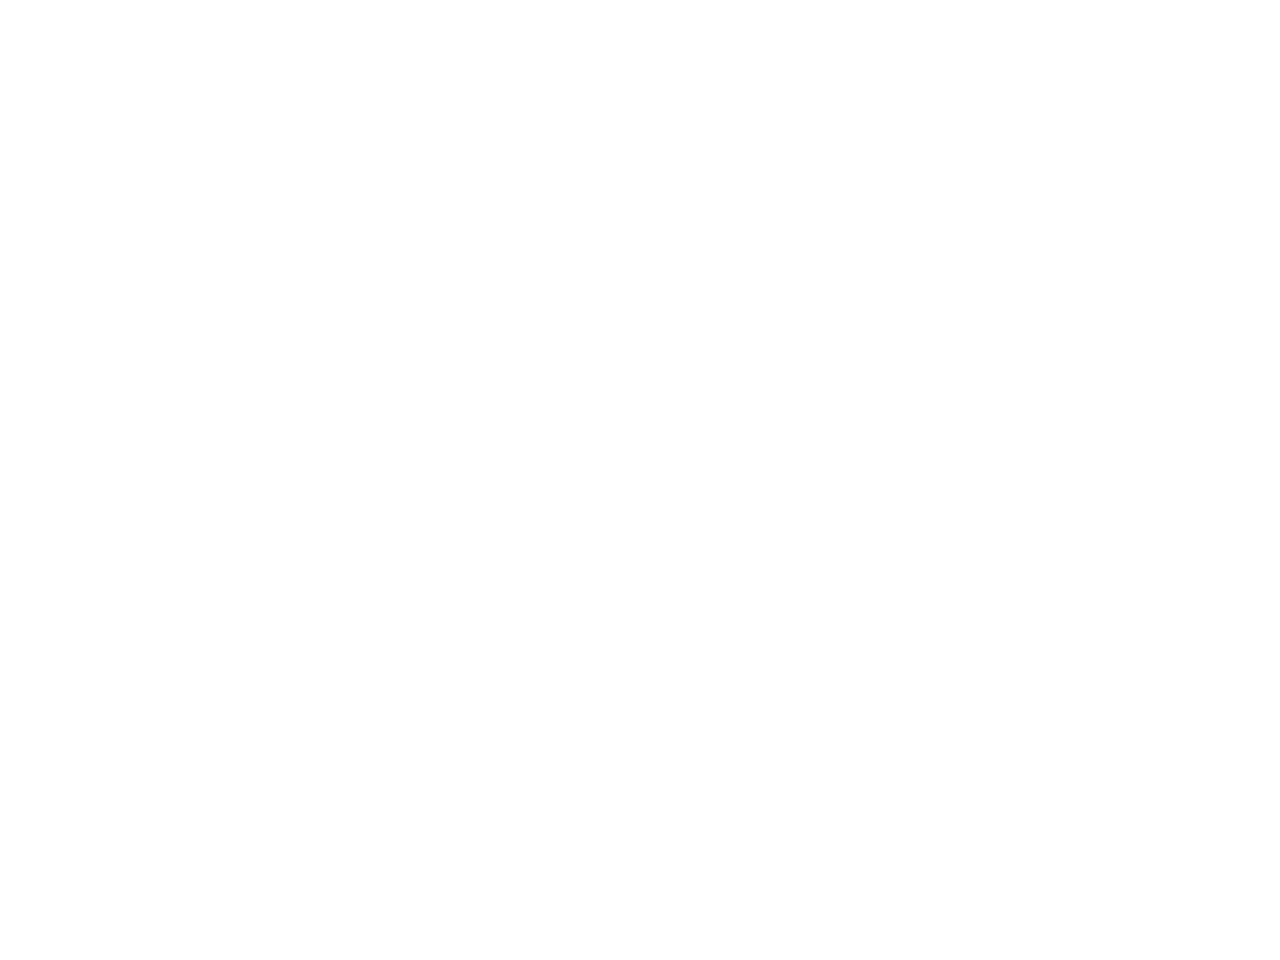

In [1]:
import librosa
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from IPython.display import Audio
%run 'PeakFinding.ipynb'
%matplotlib notebook

samples, fs = librosa.load(r"/Users/ji-macbook15/Desktop/moo/1.mp3", sr=44100, mono=True)



In [2]:
plt.figure(2)
fig, ax = plt.subplots()
S, freqs, times, im = ax.specgram(samples[::100], NFFT=4096, Fs=fs,
                                                      window=mlab.window_hanning,
                                                      noverlap=(4096 // 2))

fig.colorbar(im)  # adds colorbar to figure
Audio(samples[:1000000], rate=44100)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:

struct = generate_binary_structure(2, 1)
neighborhood = iterate_structure(struct, 20) 

ys, xs = np.histogram(S.flatten(), bins=len(freqs)//2, normed=True)
dx = xs[-1] - xs[-2]
cdf = np.cumsum(ys)*dx  # this gives you the cumulative distribution of amplitudes
cutoff = xs[np.searchsorted(cdf, 0.77)]

foreground = (S >= cutoff)


In [4]:
a = np.where(foreground, S, 0) #say (x,y) is a coordinate in the peaks (boolean 2d array) that equals false --> the 
#correspoding location in the spectrograph will be zeroed
a.shape

(2049, 61)

In [5]:
bins = np.argwhere(a) #wherever in a (all but the local maxes have been 0) that does not equal --> we record the 
#coordinates where in a[i][j] is not equal to zero.
#IMPORTANT: the bins array represents the time, frequency bins. e.g. bins[0[0] returns [0 5] --> a peak occurs at time
#bin 5 and frequency bin 0



database = {}
for i in range(bins.shape[0] - 1):
    for j in range(20):
        if (i + 1 + j) < bins.shape[0]:
            t1 = np.round(times[bins[i + j][1]],2)
            f1 = np.round(freqs[bins[i + j][0]],2)
            t2 = np.round(times[bins[i + 1 + j][1]], 2)
            f2 = np.round(freqs[bins[i + 1 + j][0]], 2)
            database[(f1, f2, t2 - t1)] = [1, t1]     
database


{(0.0, 0.0, 0.51000000000000001): [1, 0.51000000000000001],
 (0.0, 0.0, 0.1399999999999999): [1, 1.02],
 (0.0, 0.0, 0.56000000000000005): [1, 1.1599999999999999],
 (0.0, 0.0, 0.14000000000000012): [1, 2.23],
 (0.0, 0.0, 0.28000000000000003): [1, 1.8600000000000001],
 (0.0, 0.0, 0.089999999999999858): [1, 2.46],
 (0.0, 0.0, 0.24000000000000021): [1, 2.5499999999999998],
 (0.0, 10.77, -2.7400000000000002): [1, 2.79],
 (10.77, 10.77, 0.23000000000000004): [1, 0.050000000000000003],
 (10.77, 10.77, 0.049999999999999989): [1, 0.28000000000000003],
 (10.77, 10.77, 0.17999999999999999): [1, 0.33000000000000002],
 (10.77, 10.77, 0.050000000000000044): [1, 1.76],
 (10.77, 10.77, 0.039999999999999925): [1, 0.56000000000000005],
 (10.77, 10.77, 0.37): [1, 0.65000000000000002],
 (10.77, 10.77, 0.09000000000000008): [1, 1.02],
 (10.77, 10.77, 0.049999999999999822): [1, 2.46],
 (10.77, 10.77, 0.28000000000000003): [1, 1.1599999999999999],
 (10.77, 10.77, 0.22999999999999998): [1, 1.49],
 (10.77, 10.

In [8]:

def match_song(excerpt): #note to self: excerpt = [(f1,f2,deltaT),]
    templist = []
    for notes in excerpt:
        if (notes in database):
            templist.append(tuple(database[notes]))
    print(templist)
    counts = collections.Counter(templist)
    return counts.most_common()[0][0][0]

bob = match_song([(323.0, 323.0, 0.040000000000000036)])
bob

[(1, 2.3700000000000001)]


1

In [7]:
import collections

In [ ]:
collections.Counter([(1, 50, 10), (1,50, 10), (2, 50, 10), (3,50, 10)]).most_common()[0]